# Importing Required Libraries:-

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load Data:-

In [2]:
df_train = pd.read_excel('datasets_140442_330428_Data_Train.xlsx')
# temp = df_train.head()
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
df_train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


Let's seperate date of journey into Day,Month and Year columns:- 

In [5]:
df_train['Day_of_Journey'] = pd.to_datetime(df_train['Date_of_Journey']).dt.day
df_train['Month_of_Journey'] = pd.to_datetime(df_train['Date_of_Journey']).dt.month
df_train['Year_of_Journey'] = pd.to_datetime(df_train['Date_of_Journey']).dt.year
df_train.drop('Date_of_Journey',axis=1,inplace=True)
df_train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,2019


Simillary, we can divide duration into Hour and Minute columns:-

In [6]:
duration = list(df_train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split("h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split("m")[0].split()[-1]))   # Extracts only minutes from duration

df_train['Journey_Hour'] = duration_hours
df_train['Journey_Minute'] = duration_mins

df_train.drop('Duration',axis=1,inplace=True)

df_train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Journey_Hour,Journey_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,No info,3897,24,3,2019,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,No info,7662,5,1,2019,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2 stops,No info,13882,6,9,2019,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1 stop,No info,6218,5,12,2019,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1 stop,No info,13302,3,1,2019,4,45


In [7]:
df_train.isnull().sum()

Airline             0
Source              0
Destination         0
Route               1
Dep_Time            0
Arrival_Time        0
Total_Stops         1
Additional_Info     0
Price               0
Day_of_Journey      0
Month_of_Journey    0
Year_of_Journey     0
Journey_Hour        0
Journey_Minute      0
dtype: int64

As the missing values are not much so simply, we can dropped it.

In [8]:
df_train.dropna(0,inplace=True)

In [9]:
df_train.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [10]:
df_train.Source.value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [11]:
df_train.Route.value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
BOM → JLR → HYD             1
CCU → RPR → HYD → BLR       1
BOM → VNS → DEL → HYD       1
BOM → COK → MAA → HYD       1
BOM → UDR → DEL → HYD       1
Name: Route, Length: 128, dtype: int64

Same like Duration we will divide Hour and Minute columns from Departure and Arrival data.

In [12]:
df_train['Dep_hour'] = pd.to_datetime(df_train['Dep_Time']).dt.hour
df_train['Dep_min'] = pd.to_datetime(df_train['Dep_Time']).dt.minute
df_train.drop('Dep_Time',axis=1,inplace=True)
df_train.head()

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Journey_Hour,Journey_Minute,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,non-stop,No info,3897,24,3,2019,2,50,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,2 stops,No info,7662,5,1,2019,7,25,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,2 stops,No info,13882,6,9,2019,19,0,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,1 stop,No info,6218,5,12,2019,5,25,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,1 stop,No info,13302,3,1,2019,4,45,16,50


In [13]:
df_train['Arrival_hour'] = pd.to_datetime(df_train['Arrival_Time']).dt.hour
df_train['Arrival_min'] = pd.to_datetime(df_train['Arrival_Time']).dt.minute
df_train.drop('Arrival_Time',axis=1,inplace=True)
df_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Journey_Hour,Journey_Minute,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,2,50,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,2019,7,25,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,2019,19,0,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,2019,5,25,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,2019,4,45,16,50,21,35


In [14]:
df_train.shape

(10682, 16)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Jet Airways Business'),
  Text(1, 0, 'Jet Airways'),
  Text(2, 0, 'Multiple carriers'),
  Text(3, 0, 'Air India'),
  Text(4, 0, 'SpiceJet'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'IndiGo'),
  Text(7, 0, 'Vistara'),
  Text(8, 0, 'Multiple carriers Premium economy'),
  Text(9, 0, 'Air Asia'),
  Text(10, 0, 'Vistara Premium economy'),
  Text(11, 0, 'Trujet')])

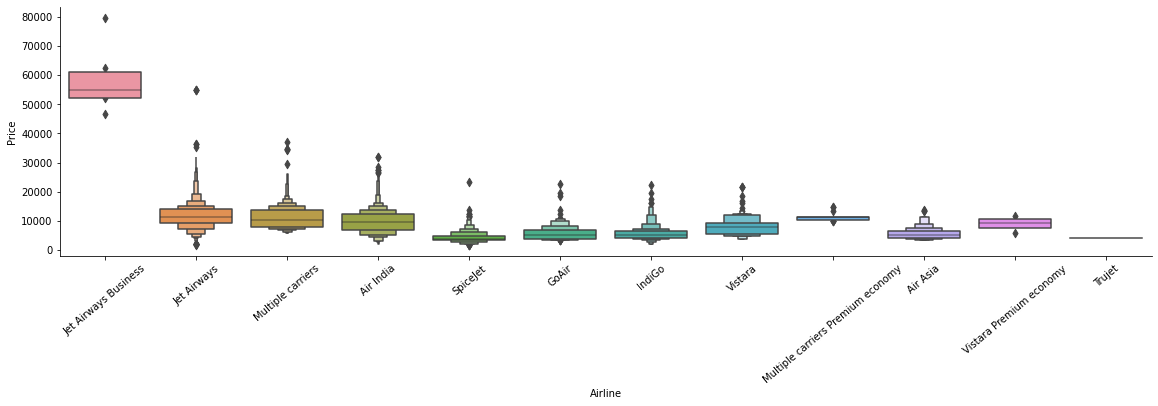

In [15]:
sns.catplot(x='Airline',y='Price',data = df_train.sort_values('Price',ascending=False),kind='boxen',height=4,aspect=4)
plt.xticks(rotation=40)

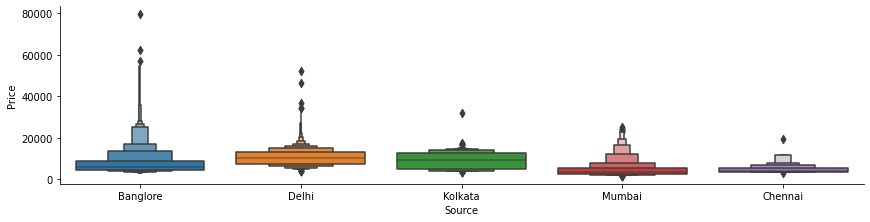

In [16]:
sns.catplot(x='Source',y='Price',data = df_train.sort_values('Price',ascending=False),kind='boxen',height=3,aspect=4)

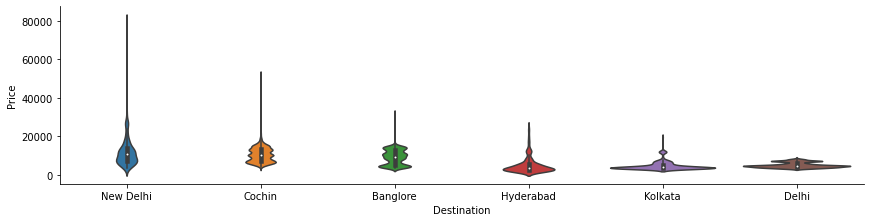

In [17]:
sns.catplot(x='Destination',y='Price',data = df_train.sort_values('Price',ascending=False),kind='violin',height=3,aspect=4)

In [18]:
# Dropping unnecessary columns from the dataset.

df_train.drop(['Route','Additional_Info'],axis=1,inplace=True)
df_train.head()

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Journey_Hour,Journey_Minute,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,2019,2,50,22,20,1,10
1,Air India,Kolkata,Banglore,2 stops,7662,5,1,2019,7,25,5,50,13,15
2,Jet Airways,Delhi,Cochin,2 stops,13882,6,9,2019,19,0,9,25,4,25
3,IndiGo,Kolkata,Banglore,1 stop,6218,5,12,2019,5,25,18,5,23,30
4,IndiGo,Banglore,New Delhi,1 stop,13302,3,1,2019,4,45,16,50,21,35


In [19]:
df_train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [20]:
df_train.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)
df_train.head()

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Journey_Hour,Journey_Minute,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,2,50,22,20,1,10
1,Air India,Kolkata,Banglore,2,7662,5,1,2019,7,25,5,50,13,15
2,Jet Airways,Delhi,Cochin,2,13882,6,9,2019,19,0,9,25,4,25
3,IndiGo,Kolkata,Banglore,1,6218,5,12,2019,5,25,18,5,23,30
4,IndiGo,Banglore,New Delhi,1,13302,3,1,2019,4,45,16,50,21,35


In [21]:
airlines = pd.get_dummies(df_train['Airline'],drop_first=True)
source = pd.get_dummies(df_train['Source'],drop_first=True)
des = pd.get_dummies(df_train['Destination'],drop_first=True)

In [22]:
df_train = pd.concat([df_train,airlines,source,des],axis=1)
df_train.drop(['Airline','Source','Destination'],axis=1,inplace=True)
df_train.columns

Index(['Total_Stops', 'Price', 'Day_of_Journey', 'Month_of_Journey',
       'Year_of_Journey', 'Journey_Hour', 'Journey_Minute', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Air India', 'GoAir',
       'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

In [23]:
df_train.shape

(10682, 31)

# Let's work on Test Dataset:-

In [24]:
df_test = pd.read_excel('datasets_140442_330428_Test_set.xlsx')
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [25]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [26]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [27]:
# Journey_date

df_test['Day_of_Journey'] = pd.to_datetime(df_test['Date_of_Journey']).dt.day
df_test['Month_of_Journey'] = pd.to_datetime(df_test['Date_of_Journey']).dt.month
df_test['Year_of_Journey'] = pd.to_datetime(df_test['Date_of_Journey']).dt.year
df_test.drop('Date_of_Journey',axis=1,inplace=True)

#Departure_Time

df_test['Dep_hour'] = pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test['Dep_min'] = pd.to_datetime(df_test['Dep_Time']).dt.minute
df_test.drop('Dep_Time',axis=1,inplace=True)

# Arrival_Time

df_test['Arrival_hour'] = pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['Arrival_min'] = pd.to_datetime(df_test['Arrival_Time']).dt.minute
df_test.drop('Arrival_Time',axis=1,inplace=True)

# Duration

duration = list(df_test["Duration"])

for i in range(len(duration)):
    # print(i)   # row - 2h / 3m
    
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        
        if "h" in duration[i]:    # hour
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:                     # min
            duration[i] = "0h " + duration[i]           # Adds 0 hour

            
duration_hours = []
duration_mins = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split("h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split("m")[0].split()[-1]))   # Extracts only minutes from duration

df_test['Journey_Hour'] = duration_hours
df_test['Journey_Minute'] = duration_mins


df_test.drop('Duration',axis=1,inplace=True)

df_test.drop(['Route','Additional_Info'],axis=1,inplace=True)

df_test['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

# Dummy Variables

airlines = pd.get_dummies(df_test['Airline'],drop_first=True)
source = pd.get_dummies(df_test['Source'],drop_first=True)
des = pd.get_dummies(df_test['Destination'],drop_first=True)

df_test = pd.concat([df_test,airlines,source,des],axis=1)
df_test.drop(['Airline','Source','Destination'],axis=1,inplace=True)

df_test.head()

,Total_Stops,Day_of_Journey,Month_of_Journey,Year_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Journey_Hour,Journey_Minute,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,2019,17,30,4,25,10,55,...,0,0,1,0,0,1,0,0,0,0
1,1,5,12,2019,6,20,10,20,4,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,2019,19,15,19,0,23,45,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,2019,8,0,21,0,13,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,2019,23,55,2,45,2,50,...,0,0,0,0,0,0,1,0,0,0


# Split the data and seeing Important Features:-

In [28]:
X = df_train.drop('Price',axis=1)
y = df_train['Price']

<AxesSubplot:>

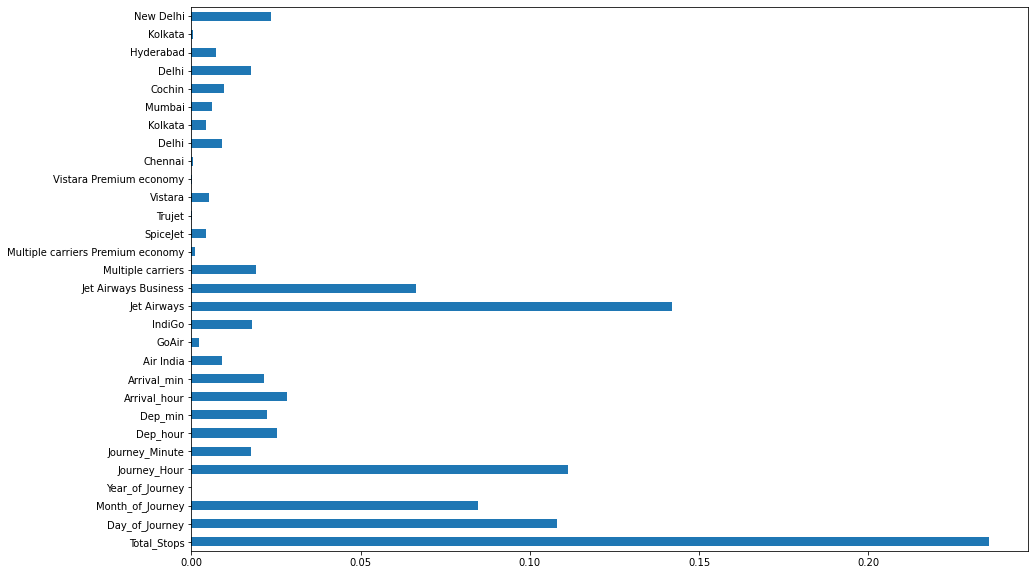

In [29]:
plt.figure(figsize=[15,10])
from sklearn.ensemble import ExtraTreesRegressor
feature_model = ExtraTreesRegressor()
feature_model.fit(X,y)

pd.Series(feature_model.feature_importances_ , index = X.columns).plot(kind='barh')

**We can see the major important feature is coming out Total_Stops, which is fair enough because depending upon number of stops the ticket prices would be vary**

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=4)

In [31]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error

from sklearn.metrics import r2_score

In [32]:
rf = RandomForestRegressor()
lr = LinearRegression()
la = Lasso()
gb = GradientBoostingRegressor()

rf.fit(X_train,y_train)
pred_1 = rf.predict(X_test)
print("RandomForestRegressor: ", r2_score(y_test,pred_1))

lr.fit(X_train,y_train)
pred_2 = lr.predict(X_test)
print("LinearRegression: ", r2_score(y_test,pred_2))

la.fit(X_train,y_train)
pred_3 = la.predict(X_test)
print("Lasso: ", r2_score(y_test,pred_3))

gb.fit(X_train,y_train)
pred_5 = gb.predict(X_test)
print("GradientBoostingRegressor: ", r2_score(y_test,pred_5))

RandomForestRegressor:  0.8035076183885214
LinearRegression:  0.621378888697901
Lasso:  0.6213898580357926
GradientBoostingRegressor:  0.7990404841773939


c:\users\nikhil\python\python 3.7\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

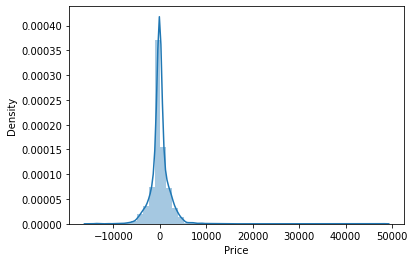

In [36]:
sns.distplot(y_test - pred_1)

In [38]:
mae = mean_absolute_error(y_test,pred_1)
print("The Mean Absolute Error: ",mae)

mse = mean_squared_error(y_test,pred_1)
print("The Mean Square Error: ",mse)

rmse = mean_squared_error(y_test,pred_1,squared=False)
print("The Root Mean Square Error: ",rmse)

The Mean Absolute Error:  1211.4218375039418
The Mean Square Error:  4373838.223675479
The Root Mean Square Error:  2091.372330235695


# Now, Let's do HyperParameter tuning on GradientBoostingRegressor:-

In [39]:
from sklearn.model_selection import RandomizedSearchCV

In [40]:
# Number of trees in random forest
n_estimators = [150,400,800,1200,1600]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [5,8,10]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [41]:
params= {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [42]:
random_cv = RandomizedSearchCV(estimator = gb, param_distributions = params,scoring='neg_mean_squared_error', 
                               n_iter = 50, cv =3, verbose=2, random_state=8, n_jobs = -1)
random_cv.fit(X_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 8, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [150, 400, 800, 1200,
                                                         1600]},
                   random_state=8, scoring='neg_mean_squared_error', verbose=2)

In [37]:
random_cv.best_params_

NameError: name 'random_cv' is not defined

In [40]:
prediction = random_cv.predict(X_test)

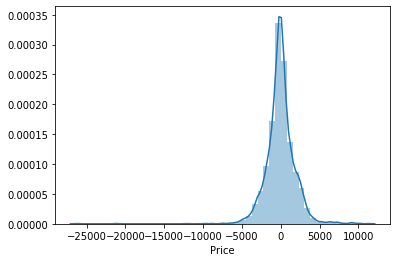

In [41]:
sns.distplot(y_test - prediction)

In [42]:
r2_score(y_test,prediction)

0.8397736379094641

In [43]:
mae = mean_absolute_error(y_test,prediction)
print("The Mean Absolute Error: ",mae)

mse = mean_squared_error(y_test,prediction)
print("The Mean Square Error: ",mse)

rmse = mean_squared_error(y_test,prediction,squared=False)
print("The Root Mean Square Error: ",rmse)

The Mean Absolute Error:  1265.8542797815703
The Mean Square Error:  3566571.7988890936
The Root Mean Square Error:  1888.5369466571453


In [44]:
ran_rf = random_cv.best_estimator_
ran_rf

GradientBoostingRegressor(max_depth=5, max_features='sqrt',
                          min_samples_split=10, n_estimators=400)

# Save the Model:-

In [45]:
import pickle

# Open the file where you want to store the data
file = open("Flight_price_prediction.pkl",'wb')

# dump information to that file
pickle.dump(ran_rf,file)

In [46]:
model = open('Flight_price_prediction.pkl','rb')

forest = pickle.load(model)

In [47]:
prediction = forest.predict(X_test)

print("R2_Score is: {}".format(r2_score(y_test,prediction)/0.01))

83.97736379094641